In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import matplotlib 
import seaborn as sns 
from matplotlib.colors import ListedColormap 
import matplotlib.patches as mpatches

In [4]:
from scipy.stats import normaltest, test 
from sklearn.preprocessing import OneHotEncoder, LabelEncoder, StandardScaler 
from sklearn.metrics import r2_score, median_absolute_error, mean_absolute_error, accuracy_score, f1_score 
from sklearn.metrics import mean_squared_log_error 
from sklearn.metrics import classification_report, confusion_matrix 
from scipy.special import boxcox, inv_boxcox


In [5]:
from sklearn.linear_model import LogisticRegression, LogisticRegressionCV 
from sklearn.model_selection import train_test_split,cross_val_score, GridSearchCV, StratifiedKFold, cross_val_predict, KFold 
from sklearn.neighbors import KNeighborsClassifier 
from sklearn.linear_model import LogisticRegression 
from sklearn.tree import DecisionTreeClassifier 
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier 
from sklearn.ensemble import AdaBoostClassifier 
from sklearn.svm import SVC 
from sklearn.metrics import roc_curve, auc 
from sklearn.decomposition import PCA 
from scipy.stats import zscore 
from itertools import combinations 
from sklearn.ensemble import IsolationForest 
from sklearn.cluster import KMeans 

In [10]:
#loading the data set
df = pd.DataFrame
import csv

In [12]:
data_df = pd.read_csv("METABRIC_RNA_Mutation.csv")
data_df

/var/folders/gj/7ksb4gv53ml_ryr5sn4vfm1w0000gn/T/ipykernel_67203/736501803.py:1: DtypeWarning: Columns (678,688,690,692) have mixed types. Specify dtype option on import or set low_memory=False.
  data_df = pd.read_csv("METABRIC_RNA_Mutation.csv")


,patient_id,age_at_diagnosis,type_of_breast_surgery,cancer_type,cancer_type_detailed,cellularity,chemotherapy,pam50_+_claudin-low_subtype,cohort,er_status_measured_by_ihc,...,mtap_mut,ppp2cb_mut,smarcd1_mut,nras_mut,ndfip1_mut,hras_mut,prps2_mut,smarcb1_mut,stmn2_mut,siah1_mut
0,0,75.65,MASTECTOMY,Breast Cancer,Breast Invasive Ductal Carcinoma,NaN,0,claudin-low,1.0,Positve,...,0,0,0,0,0,0,0,0,0,0
1,2,43.19,BREAST CONSERVING,Breast Cancer,Breast Invasive Ductal Carcinoma,High,0,LumA,1.0,Positve,...,0,0,0,0,0,0,0,0,0,0
2,5,48.87,MASTECTOMY,Breast Cancer,Breast Invasive Ductal Carcinoma,High,1,LumB,1.0,Positve,...,0,0,0,0,0,0,0,0,0,0
3,6,47.68,MASTECTOMY,Breast Cancer,Breast Mixed Ductal and Lobular Carcinoma,Moderate,1,LumB,1.0,Positve,...,0,0,0,0,0,0,0,0,0,0
4,8,76.97,MASTECTOMY,Breast Cancer,Breast Mixed Ductal and Lobular Carcinoma,High,1,LumB,1.0,Positve,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1899,7295,43.10,BREAST CONSERVING,Breast Cancer,Breast Invasive Lobular Carcinoma,High,0,LumA,4.0,Positve,...,0,0,0,0,0,0,0,0,0,0
1900,7296,42.88,MASTECTOMY,Breast Cancer,Breast Invasive Ductal Carcinoma,High,0,LumB,4.0,Positve,...,0,0,0,0,0,0,0,0,0,0
1901,7297,62.90,MASTECTOMY,Breast Cancer,Breast Invasive Ductal Carcinoma,High,0,LumB,4.0,Positve,...,0,0,0,0,0,0,0,0,0,0
1902,7298,61.16,MASTECTOMY,Breast Cancer,Breast Invasive Ductal Carcinoma,Moderate,0,LumB,4.0,Positve,...,0,0,0,0,0,0,0,0,0,0


In [14]:
print(f"There are {data_df.shape[0]} rows and {data_df.shape[1]} columns")

There are 1904 rows and 693 columns


In [30]:
# Review the first 5 rows of the data 
data_df.head(5)

,patient_id,age_at_diagnosis,type_of_breast_surgery,cancer_type,cancer_type_detailed,cellularity,chemotherapy,pam50_+_claudin-low_subtype,cohort,er_status_measured_by_ihc,...,mtap_mut,ppp2cb_mut,smarcd1_mut,nras_mut,ndfip1_mut,hras_mut,prps2_mut,smarcb1_mut,stmn2_mut,siah1_mut
0,0,75.65,MASTECTOMY,Breast Cancer,Breast Invasive Ductal Carcinoma,NaN,0,claudin-low,1.0,Positve,...,0,0,0,0,0,0,0,0,0,0
1,2,43.19,BREAST CONSERVING,Breast Cancer,Breast Invasive Ductal Carcinoma,High,0,LumA,1.0,Positve,...,0,0,0,0,0,0,0,0,0,0
2,5,48.87,MASTECTOMY,Breast Cancer,Breast Invasive Ductal Carcinoma,High,1,LumB,1.0,Positve,...,0,0,0,0,0,0,0,0,0,0
3,6,47.68,MASTECTOMY,Breast Cancer,Breast Mixed Ductal and Lobular Carcinoma,Moderate,1,LumB,1.0,Positve,...,0,0,0,0,0,0,0,0,0,0
4,8,76.97,MASTECTOMY,Breast Cancer,Breast Mixed Ductal and Lobular Carcinoma,High,1,LumB,1.0,Positve,...,0,0,0,0,0,0,0,0,0,0


In [17]:
# Checking the unique values in each column
data_nunique = data_df.nunique()
df_unique = pd.DataFrame({"Attribute": data_nunique.index , "Unique_value": data_nunique.values})
df_unique

,Attribute,Unique_value
0,patient_id,1904
1,age_at_diagnosis,1572
2,type_of_breast_surgery,2
3,cancer_type,2
4,cancer_type_detailed,6
...,...,...
688,hras_mut,4
689,prps2_mut,3
690,smarcb1_mut,4
691,stmn2_mut,3


In [18]:
# The missing value and finding missing value of each columns 
total = data_df.isnull().sum().sort_values(ascending  = False)
percent = round((data_df.isnull().sum())/(data_df.isnull().count()),2)*100
null_value = pd.concat([total, percent], axis = 1, keys = ['null_values', 'null_value_percentage'])
null_value.head(15)

,null_values,null_value_percentage
tumor_stage,501,26.0
3-gene_classifier_subtype,204,11.0
primary_tumor_laterality,106,6.0
neoplasm_histologic_grade,72,4.0
cellularity,54,3.0
mutation_count,45,2.0
er_status_measured_by_ihc,30,2.0
type_of_breast_surgery,22,1.0
tumor_size,20,1.0
cancer_type_detailed,15,1.0


<Axes: >

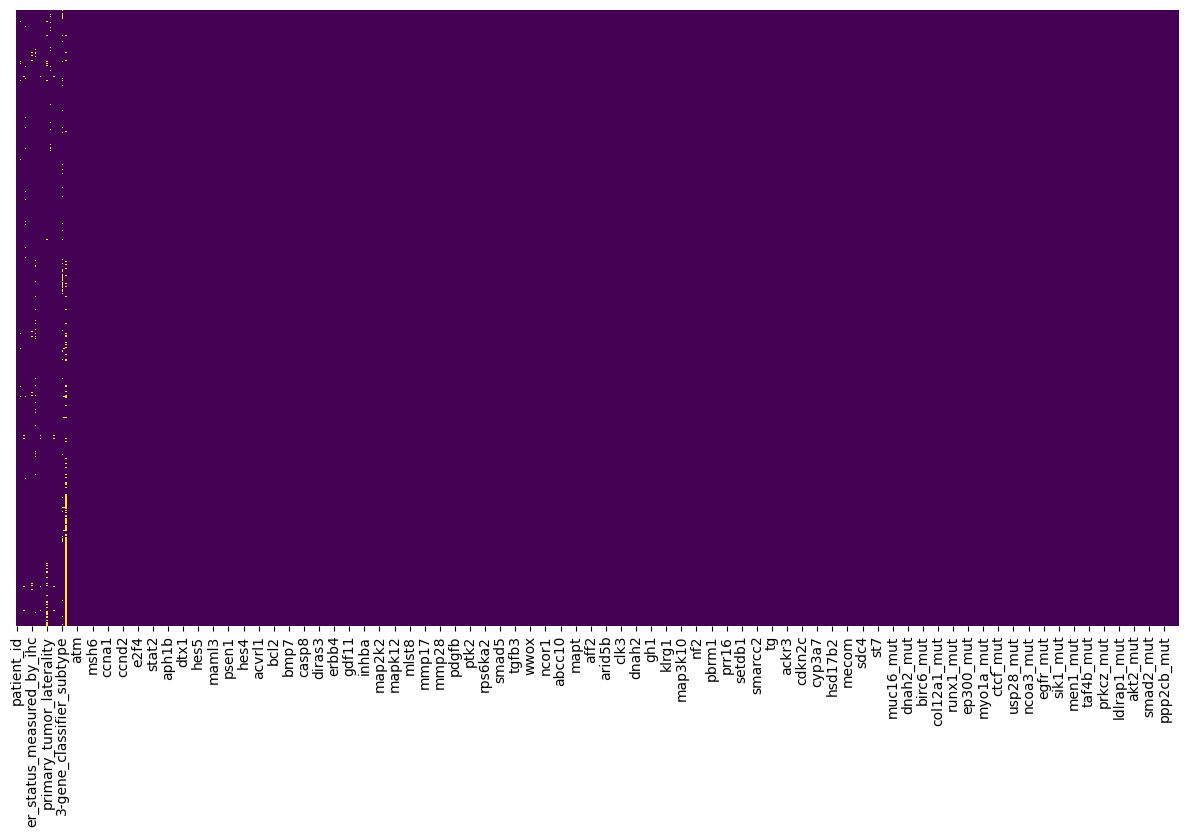

In [19]:
import matplotlib.pyplot as plt
import seaborn as sns

fig, ax = plt.subplots(figsize=(15, 8))

# Use clinical_df.isnull() to create a Boolean mask for missing values
sns.heatmap(clinical_df.isnull(), yticklabels = False, cbar = False, cmap = 'viridis')

In [20]:
clinical_df.describe().transpose().head()


,count,mean,std,min,25%,50%,75%,max
patient_id,1904.0,3921.982143,2358.478332,0.00,896.500,4730.50,5536.2500,7299.00
age_at_diagnosis,1904.0,61.087054,12.978711,21.93,51.375,61.77,70.5925,96.29
chemotherapy,1904.0,0.207983,0.405971,0.00,0.000,0.00,0.0000,1.00
cohort,1904.0,2.643908,1.228615,1.00,1.000,3.00,3.0000,5.00
neoplasm_histologic_grade,1832.0,2.415939,0.650612,1.00,2.000,3.00,3.0000,3.00


In [22]:
data_attribute_drop = data_df.columns[31:]
data_attribute = data_df.drop(data_attribute_drop, axis = 1)
data_attribute

,patient_id,age_at_diagnosis,type_of_breast_surgery,cancer_type,cancer_type_detailed,cellularity,chemotherapy,pam50_+_claudin-low_subtype,cohort,er_status_measured_by_ihc,...,nottingham_prognostic_index,oncotree_code,overall_survival_months,overall_survival,pr_status,radio_therapy,3-gene_classifier_subtype,tumor_size,tumor_stage,death_from_cancer
0,0,75.65,MASTECTOMY,Breast Cancer,Breast Invasive Ductal Carcinoma,NaN,0,claudin-low,1.0,Positve,...,6.044,IDC,140.500000,1,Negative,1,ER-/HER2-,22.0,2.0,Living
1,2,43.19,BREAST CONSERVING,Breast Cancer,Breast Invasive Ductal Carcinoma,High,0,LumA,1.0,Positve,...,4.020,IDC,84.633333,1,Positive,1,ER+/HER2- High Prolif,10.0,1.0,Living
2,5,48.87,MASTECTOMY,Breast Cancer,Breast Invasive Ductal Carcinoma,High,1,LumB,1.0,Positve,...,4.030,IDC,163.700000,0,Positive,0,NaN,15.0,2.0,Died of Disease
3,6,47.68,MASTECTOMY,Breast Cancer,Breast Mixed Ductal and Lobular Carcinoma,Moderate,1,LumB,1.0,Positve,...,4.050,MDLC,164.933333,1,Positive,1,NaN,25.0,2.0,Living
4,8,76.97,MASTECTOMY,Breast Cancer,Breast Mixed Ductal and Lobular Carcinoma,High,1,LumB,1.0,Positve,...,6.080,MDLC,41.366667,0,Positive,1,ER+/HER2- High Prolif,40.0,2.0,Died of Disease
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1899,7295,43.10,BREAST CONSERVING,Breast Cancer,Breast Invasive Lobular Carcinoma,High,0,LumA,4.0,Positve,...,5.050,ILC,196.866667,1,Positive,1,ER+/HER2- Low Prolif,25.0,NaN,Living
1900,7296,42.88,MASTECTOMY,Breast Cancer,Breast Invasive Ductal Carcinoma,High,0,LumB,4.0,Positve,...,5.040,IDC,44.733333,0,Negative,1,NaN,20.0,NaN,Died of Disease
1901,7297,62.90,MASTECTOMY,Breast Cancer,Breast Invasive Ductal Carcinoma,High,0,LumB,4.0,Positve,...,6.050,IDC,175.966667,0,Positive,1,NaN,25.0,NaN,Died of Disease
1902,7298,61.16,MASTECTOMY,Breast Cancer,Breast Invasive Ductal Carcinoma,Moderate,0,LumB,4.0,Positve,...,5.050,IDC,86.233333,0,Positive,0,ER+/HER2- High Prolif,25.0,NaN,Died of Other Causes


In [23]:
data_attribute.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1904 entries, 0 to 1903
Data columns (total 31 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   patient_id                      1904 non-null   int64  
 1   age_at_diagnosis                1904 non-null   float64
 2   type_of_breast_surgery          1882 non-null   object 
 3   cancer_type                     1904 non-null   object 
 4   cancer_type_detailed            1889 non-null   object 
 5   cellularity                     1850 non-null   object 
 6   chemotherapy                    1904 non-null   int64  
 7   pam50_+_claudin-low_subtype     1904 non-null   object 
 8   cohort                          1904 non-null   float64
 9   er_status_measured_by_ihc       1874 non-null   object 
 10  er_status                       1904 non-null   object 
 11  neoplasm_histologic_grade       1832 non-null   float64
 12  her2_status_measured_by_snp6    19

In [24]:
data_df.select_dtypes(include = np.number)

,patient_id,age_at_diagnosis,chemotherapy,cohort,neoplasm_histologic_grade,hormone_therapy,lymph_nodes_examined_positive,mutation_count,nottingham_prognostic_index,overall_survival_months,...,srd5a1,srd5a2,srd5a3,st7,star,tnk2,tulp4,ugt2b15,ugt2b17,ugt2b7
0,0,75.65,0,1.0,3.0,1,10.0,NaN,6.044,140.500000,...,-1.1877,-0.0194,-1.6345,-0.2142,-0.5698,-1.1741,-1.4779,-0.5954,-0.8847,-0.3354
1,2,43.19,0,1.0,3.0,1,0.0,2.0,4.020,84.633333,...,-0.4412,0.4534,0.4068,0.7634,0.0231,0.9121,-0.9538,-0.2264,0.5398,-0.8920
2,5,48.87,1,1.0,2.0,1,1.0,2.0,4.030,163.700000,...,-0.5381,0.0668,0.8344,1.7227,0.4024,-3.7172,-1.5538,1.3701,-0.1078,0.3655
3,6,47.68,1,1.0,2.0,1,3.0,1.0,4.050,164.933333,...,-0.5630,-0.7078,0.8228,0.6819,-0.1948,-2.3286,-0.9924,-0.3154,0.2320,-0.4828
4,8,76.97,1,1.0,3.0,1,8.0,2.0,6.080,41.366667,...,-0.5845,-0.3544,-1.0150,2.2961,0.1817,-0.1572,0.0427,5.0048,3.8476,1.3223
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1899,7295,43.10,0,4.0,3.0,1,1.0,4.0,5.050,196.866667,...,0.7859,1.5304,1.1196,0.8116,0.0958,-1.2644,-0.3566,-0.2615,-0.6371,-0.5540
1900,7296,42.88,0,4.0,3.0,0,1.0,6.0,5.040,44.733333,...,-0.5294,-0.6610,-0.1610,0.2251,0.5127,-0.3412,-1.0703,-0.6950,0.0641,-0.8863
1901,7297,62.90,0,4.0,3.0,1,45.0,4.0,6.050,175.966667,...,-0.1457,-0.5194,2.3968,0.5917,-0.8643,-1.3541,-1.8076,-0.1840,0.0967,-0.6264
1902,7298,61.16,0,4.0,2.0,1,12.0,15.0,5.050,86.233333,...,-0.6380,-1.5275,1.1070,0.2194,1.4317,-0.6985,-0.6046,-0.4915,-0.2847,-0.8041


In [26]:
def standard_scaler(df):
    attribute = df.columns.tolist 

/var/folders/gj/7ksb4gv53ml_ryr5sn4vfm1w0000gn/T/ipykernel_67203/3429274094.py:15: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), fontsize = 12, rotation = 60)


Text(0.5, 1.0, 'The Distribution of Clinical Attributes')

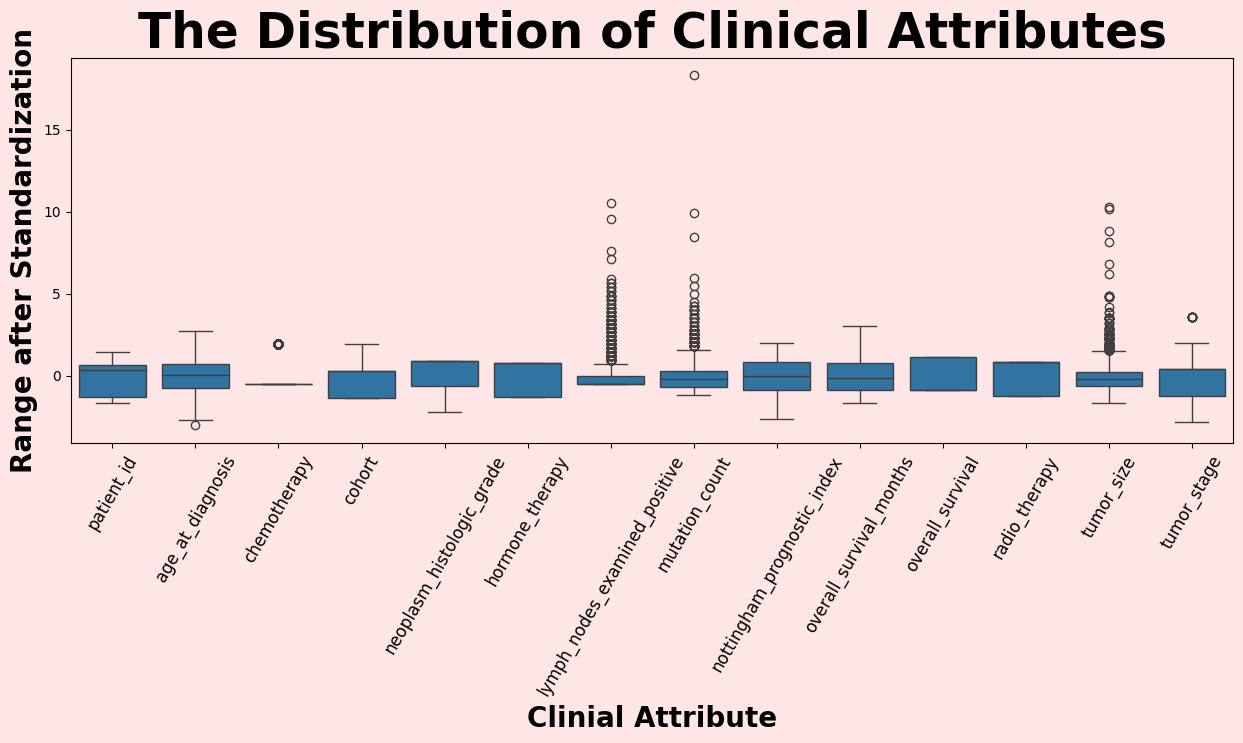

In [27]:
# Dropping the variable are object dtypes 
attribute_num = data_attribute[data_attribute.select_dtypes(include = 'number').columns.to_list()]

# Transforming the clinical attributes into the standard form after dropping the objective attributes
ss = StandardScaler()
attribute_nums = ss.fit_transform(attribute_num)
attribute_df = pd.DataFrame(attribute_nums, index = attribute_num.index, columns = attribute_num.columns)
attribute_df = pd.melt(attribute_df)

# Visualizing these attributes
fig, ax = plt.subplots(1,1, figsize = (15,5))
sns.boxplot(x = 'variable', y = 'value', data = attribute_df)
plt.xlabel('Clinial Attribute', fontsize = 20, fontweight = 'bold')
plt.ylabel("Range after Standardization", fontsize = 20, fontweight = 'bold')
ax.set_xticklabels(ax.get_xticklabels(), fontsize = 12, rotation = 60)

background_color = '#ffe6e6'
fig.patch.set_facecolor(background_color)
ax.set_facecolor(background_color)
plt.title('The Distribution of Clinical Attributes', fontsize = 35, fontweight = 'bold')

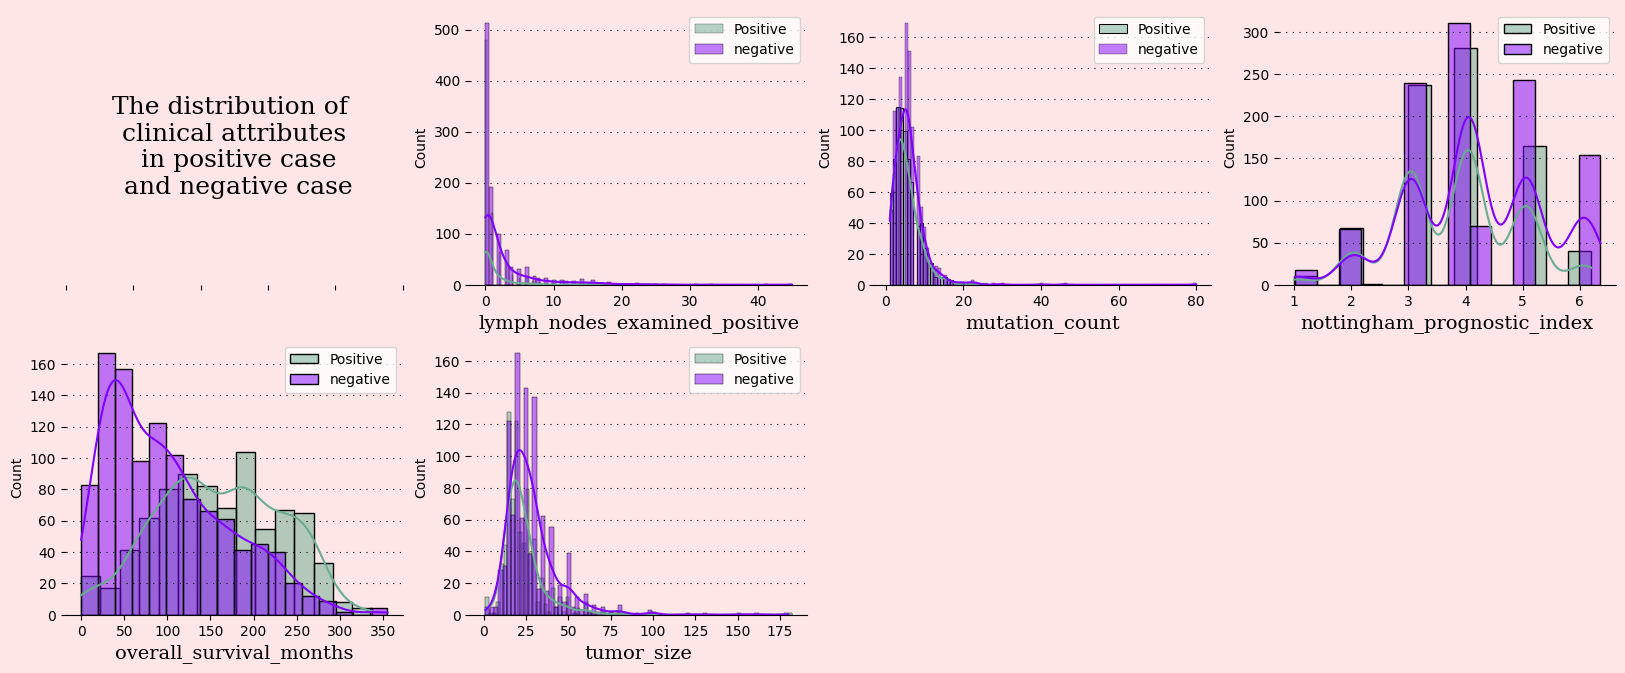

In [29]:
# The distribution of numerical clinical attributes first 
fig = plt.figure(figsize = (20, 25))
background_color = "#ffe6e6"
color_palette = ["#800000","#8000ff","#6aac90","#5833ff","#da8829"]
fig.patch.set_facecolor(background_color)
columns = ['age_at_diagnosis', 'lymph_nodes_examined_positive', 'mutation_count', 'nottingham_prognostic_index', 'overall_survival_months', 'tumor_size']

for index, column in enumerate(columns):
    ax = plt.subplot(6, 4, index + 1)
    if index == 0:
        ax.text(0.5, 0.5, "The distribution of \nclinical attributes\n in positive case\n and negative case",
               horizontalalignment = 'center',
               verticalalignment= 'center', 
               fontsize = 18, fontfamily = 'serif', color = '#000000')
        ax.set_facecolor(background_color)
        ax.spines['bottom'].set_visible(False)
        ax.spines['top'].set_visible(False)
        ax.spines['right'].set_visible(False)
        ax.spines['left'].set_visible(False)
        ax.set_xticklabels([])
        ax.set_yticklabels([])
        ax.tick_params(left = False, right = False )
        continue
    sns.histplot(x= data_attribute[data_attribute['overall_survival'] == 1][column], kde = True, color=color_palette[2], label='Positive')
    sns.histplot(x = data_attribute[data_attribute['overall_survival'] == 0][column], kde = True, color=color_palette[1], label = 'negative')
    
    ax.legend()
    
    ax.set_xlabel(column, fontsize = 14, fontfamily = 'serif', color = '#000000')
    ax.set_facecolor(background_color)
    ax.grid(color='#000000', linestyle=':', axis='y', zorder=0,  dashes=(1,5))

    for s in ['top','right', 'left']:
        ax.spines[s].set_visible(False)

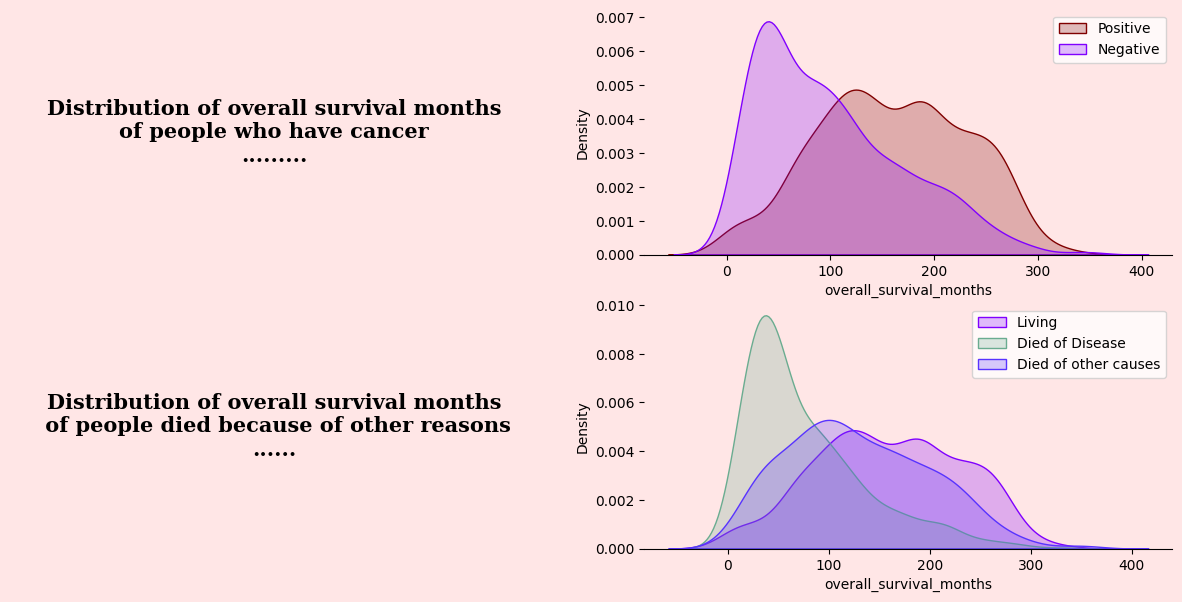

In [37]:
fig, ax = plt.subplots(2,2, figsize = (15,7))
background_color = "#ffe6e6"
color_palette = ["#800000", "#8000ff", "#6aac90", "#5833ff", "#da8829"]
fig.patch.set_facecolor(background_color)

title = ['Distribution of overall survival months\nof people who have cancer\n.........',
        'Distribution of overall survival months\n of people died because of other reasons\n......']
for i, til in enumerate(title):
    ax[i,0].text(0.5,0.5, til, 
                horizontalalignment = 'center',
                verticalalignment = 'center',
                fontsize = 15,
                fontweight = 'bold',
                fontfamily = 'serif', 
                color = '#000000')
    ax[i,0].spines['bottom'].set_visible(False)
    ax[i,0].set_xticklabels([])
    ax[i,0].set_yticklabels([])
    ax[i,0].tick_params(left = False, bottom = False)
    ax[i,0].set_facecolor(background_color)
    ax[i,0].grid(False)


sns.kdeplot(data_attribute[data_attribute['overall_survival'] == 1]['overall_survival_months'] ,ax = ax[0,1], fill = True, label = 'Positive', color = color_palette[0])
sns.kdeplot(data_attribute[data_attribute['overall_survival'] == 0]['overall_survival_months'] ,ax = ax[0,1], fill = True, label = 'Negative', color = color_palette[1])
ax[0,1].set_facecolor(background_color)
ax[0,1].legend()
ax[0,1].grid(False)

sns.kdeplot(data_attribute[data_attribute['death_from_cancer'] == 'Living']['overall_survival_months'], ax = ax[1,1], fill = True, label = 'Living', color = color_palette[1])
sns.kdeplot(data_attribute[data_attribute['death_from_cancer'] == 'Died of Disease']['overall_survival_months'], ax = ax[1,1], fill = True, label = 'Died of Disease', color = color_palette[2])
sns.kdeplot(data_attribute[data_attribute['death_from_cancer'] == 'Died of Other Causes']['overall_survival_months'], ax = ax[1,1], fill = True, label = 'Died of other causes', color = color_palette[3])
ax[1,1].set_facecolor(background_color)
ax[1,1].grid(False)

plt.legend()
for x in [(0,0), (1,0), (0,1), (1,1)]:
    for i in ['top', 'left', 'right']:
        ax[x].spines[i].set_visible(False)

plt.show()